In [2]:
%matplotlib inline
import matplotlib.pyplot as pyplot
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pandas
import seaborn
import numpy

In [3]:
boston = datasets.load_boston()
boston_df = pandas.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
instance_count, attribute_count = boston_df.shape
print(instance_count)
print(attribute_count)

506
13


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
pandas.isnull(boston_df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [7]:
boston_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [8]:
boston_df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.571586,0.735409,0.042337,0.820355,-0.310738,0.703673,-0.744381,0.726496,0.728157,0.464386,-0.358463,0.632969
ZN,-0.571586,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074
INDUS,0.735409,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747
CHAS,0.042337,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575
NOX,0.820355,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828
RM,-0.310738,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832
AGE,0.703673,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071
DIS,-0.744381,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262
RAD,0.726496,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322
TAX,0.728157,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423


In [9]:
boston_df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.461987,0.521177,0.034602,0.602035,-0.213002,0.496920,-0.539252,0.562966,0.544007,0.312570,-0.262379,0.453083
ZN,-0.461987,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818
INDUS,0.521177,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980
CHAS,0.034602,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344
NOX,0.602035,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005
RM,-0.213002,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231
AGE,0.496920,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359
DIS,-0.539252,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347
RAD,0.562966,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943
TAX,0.544007,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191


In [10]:
%timeit boston_df.corr(method='pearson')

550 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit boston_df.corr(method='spearman')

7.35 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit boston_df.corr(method='kendall')

34.5 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
pearson_corr = boston_df.corr(method='pearson')

In [14]:
corr_target = pearson_corr.ix[-1][:-1]

C:\Users\paul.lucas\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [15]:
corr_target[abs(corr_target).argsort()[::-1]]

RM        -0.613808
INDUS      0.603800
AGE        0.602339
NOX        0.590879
TAX        0.543993
DIS       -0.496996
RAD        0.488676
CRIM       0.452220
ZN        -0.412995
PTRATIO    0.374044
B         -0.366087
CHAS      -0.053929
Name: LSTAT, dtype: float64

In [16]:
pearson_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [17]:
df_attributes = pearson_corr.iloc[:-1,:-1]
threshold = 0.5
important_corrs = (df_attributes[abs(df_attributes) > threshold][df_attributes != 1.0]).unstack().dropna().to_dict()
df_important_corrs = pandas.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])),
    columns=['attribute pair', 'correlation'])
df_important_corrs = df_important_corrs.iloc[abs(df_important_corrs['correlation']).argsort()[::-1]]
df_important_corrs

,attribute pair,correlation
0,"(RAD, TAX)",0.910228
18,"(DIS, NOX)",-0.769230
14,"(INDUS, NOX)",0.763651
2,"(AGE, DIS)",-0.747881
15,"(AGE, NOX)",0.731470
7,"(INDUS, TAX)",0.720760
4,"(DIS, INDUS)",-0.708027
8,"(NOX, TAX)",0.668023
9,"(DIS, ZN)",0.664408
12,"(AGE, INDUS)",0.644779


'for i in range(len(pearson_corr)):\n    ax.text(i+0.5,len(pearson_corr)-(i+0.5), pearson_corr.columns[i], \n            ha="center", va="center", rotation=45)\n    for j in range(i+1, len(pearson_corr)):\n        s = "{:.3f}".format(pearson_corr.values[i,j])\n        ax.text(j+0.5,len(pearson_corr)-(i+0.5),s, \n            ha="center", va="center")'

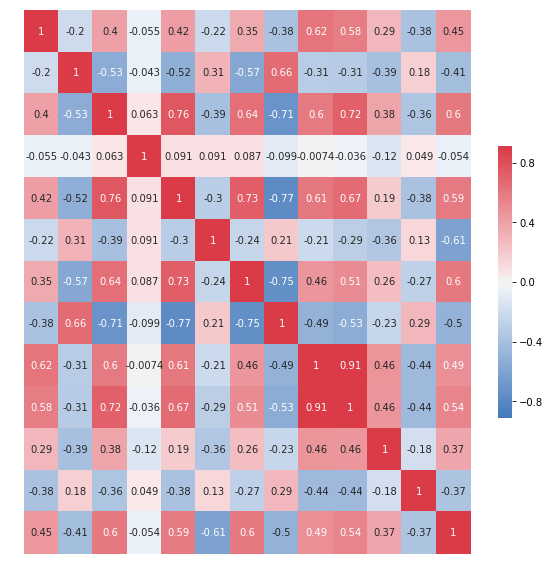

In [18]:
fig, ax = pyplot.subplots(figsize=(10,10))
mask = numpy.zeros_like(pearson_corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
vmax = numpy.abs(pearson_corr.values[~mask]).max()
ax.axis("off")
seaborn.heatmap(pearson_corr, annot=True, ax=ax, vmax=vmax, vmin=-vmax, 
                cmap=seaborn.diverging_palette(250, 10, n=3, as_cmap=True)
               , center=0
               ,cbar_kws={"shrink": .5})

"""for i in range(len(pearson_corr)):
    ax.text(i+0.5,len(pearson_corr)-(i+0.5), pearson_corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(pearson_corr)):
        s = "{:.3f}".format(pearson_corr.values[i,j])
        ax.text(j+0.5,len(pearson_corr)-(i+0.5),s, 
            ha="center", va="center")"""

(array([  1.,   0.,   1.,   0.,   0.,   2.,   0.,   1.,   0.,   1.,   2.,
          0.,   3.,   7.,   2.,   2.,   4.,  12.,   7.,  20.,  18.,  28.,
         47.,  40.,  44.,  35.,  29.,  42.,  23.,  22.,  20.,  16.,  13.,
         10.,  10.,   7.,   7.,   4.,   1.,   3.,   5.,   4.,   2.,   1.,
          1.,   4.,   2.,   0.,   0.,   3.]),
 array([ 3.561  ,  3.66538,  3.76976,  3.87414,  3.97852,  4.0829 ,
         4.18728,  4.29166,  4.39604,  4.50042,  4.6048 ,  4.70918,
         4.81356,  4.91794,  5.02232,  5.1267 ,  5.23108,  5.33546,
         5.43984,  5.54422,  5.6486 ,  5.75298,  5.85736,  5.96174,
         6.06612,  6.1705 ,  6.27488,  6.37926,  6.48364,  6.58802,
         6.6924 ,  6.79678,  6.90116,  7.00554,  7.10992,  7.2143 ,
         7.31868,  7.42306,  7.52744,  7.63182,  7.7362 ,  7.84058,
         7.94496,  8.04934,  8.15372,  8.2581 ,  8.36248,  8.46686,
         8.57124,  8.67562,  8.78   ]),
 <a list of 50 Patch objects>)

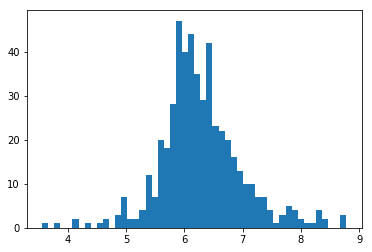

In [22]:
rm_attr = boston_df['RM']
pyplot.hist(rm_attr, bins=50)

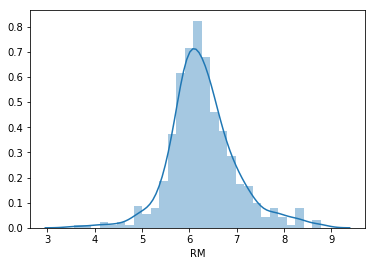

In [24]:
seaborn.distplot(rm_attr)

<Container object of 9 artists>

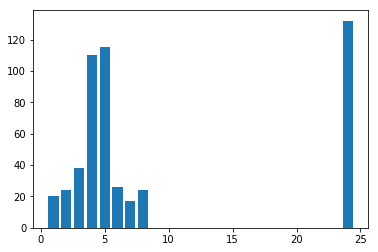

In [25]:
rad_attr = boston_df['RAD']
value_counts = rad_attr.value_counts()
values, counts = value_counts.index, value_counts
pyplot.bar(value_counts.index, value_counts)

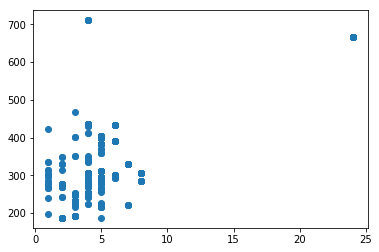

In [29]:
pyplot.scatter(boston_df['RAD'], boston_df['TAX'])

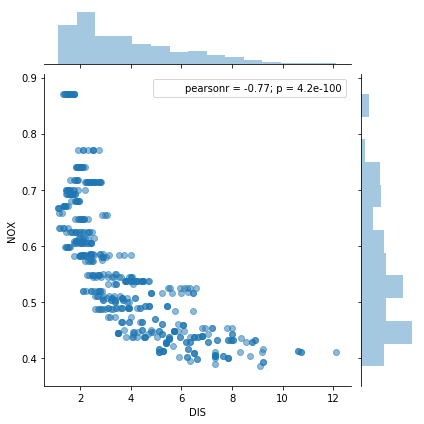

In [34]:
seaborn.jointplot(boston_df['DIS'], boston_df['NOX'], kind='scatter', joint_kws={'alpha':0.5})

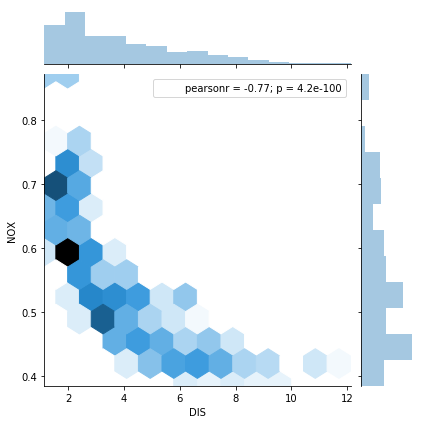

In [33]:
seaborn.jointplot(boston_df['DIS'], boston_df['NOX'], kind='hex')